In [1]:
import re
import csv

import tellurium as te
import pandas as pd
import seaborn as sns

fn_ant = '../model/euromix_man_only_liver.ant'
fn_sbml = fn_ant.replace('.ant','.sbml')

In [4]:
r_out = pd.read_csv('../tmp/r_out_only_liver.csv').drop(columns=['Unnamed: 0'])
q_cols = {'1':'QVen', '2':'QArt', '6':'QLiver',
                      '11':'QGut', '12':'QExcret', '13':'QMetab'}
r_out.rename(columns=q_cols, inplace=True)
long_r = pd.melt(r_out[['time']+list(q_cols.values())], id_vars=['time'], value_vars=q_cols.values(), 
                 var_name='quantity', value_name='value')
long_r['src'] = 'R'

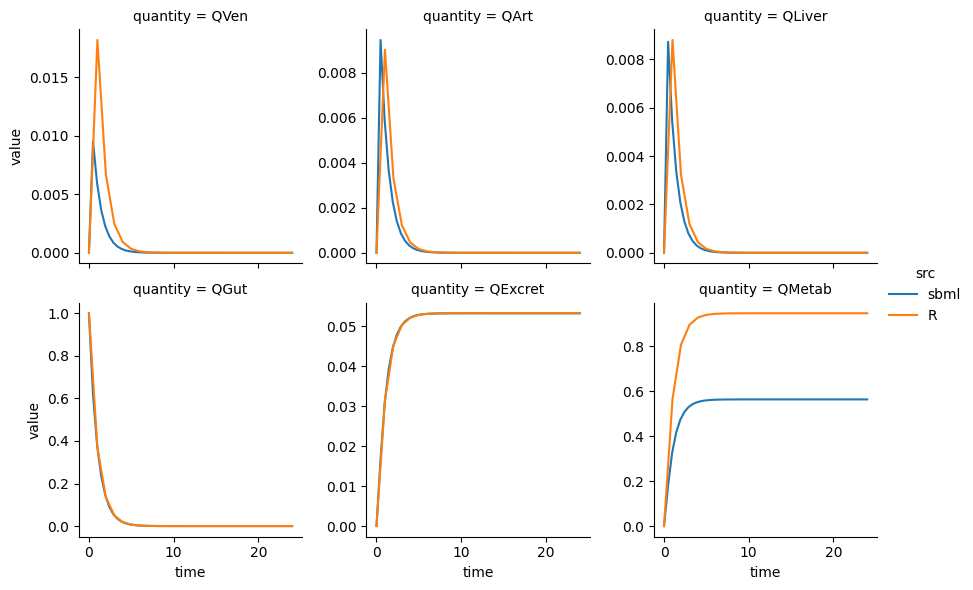

In [7]:
def compare(results):
    names = [re.sub(r'\[(.*?)\]', r'\1', name) for name in results.colnames]
    df = pd.DataFrame(results, columns=names).fillna(0)
    long_df = pd.melt(df, id_vars=['time'], value_vars=df.columns[1:], var_name='quantity', value_name='value')
    long_df['src'] = 'sbml'
    all_df = pd.concat((long_df, long_r))
    g = sns.FacetGrid(all_df, col='quantity', hue='src', col_wrap=3, sharey=False,
                     col_order=q_cols.values())
    g.map(sns.lineplot, 'time', 'value')
    g.add_legend()
    
r = te.loada(fn_ant)
r.QGut = 1
compare(r.simulate(0, 24))


There is a big difference between the amount of metabolites in the R and sbml model.